In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [9]:
MHz = 2 * jnp.pi
kHz = MHz*1e-3
us = 1
ns = 1e-3

# Fit function

In [3]:
Na = 40


def inflation_trajectory(times, kappa_2, alpha_inf, t0):
    a = dq.destroy(Na)
    L2 = jnp.sqrt(kappa_2) * (a @ a - alpha_inf**2 * dq.eye(Na))
    times_simu = jnp.linspace(0, times[-1], 10001)
    output = dq.mesolve(
        0 * dq.eye(Na), [L2], dq.fock(Na, 0), times_simu, exp_ops=[dq.dag(a) @ a]
    )
    nbars = output.expects[0].real
    return jnp.interp(times - t0, times_simu, nbars)

# Large cat

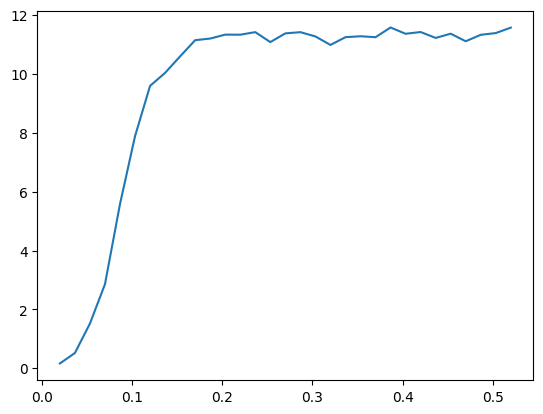

In [4]:
data = np.load("inflation_large_cat.npy", allow_pickle=True).item()
times = data["times"] * ns
nbars = data["nbars"][0]
plt.plot(times, nbars)

|██████████| 100.0% ◆ elapsed 624.81ms ◆ remaining 0.00ms  


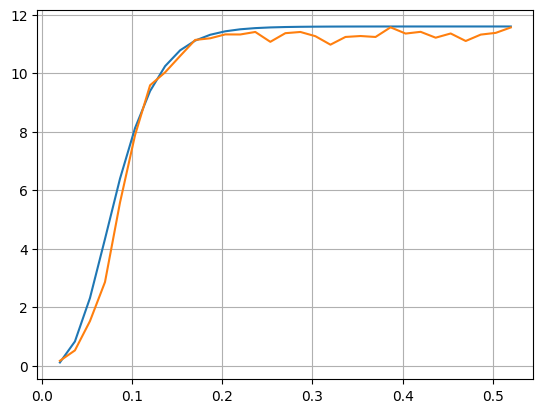

In [5]:
plt.plot(times, inflation_trajectory(times, 0.45 * MHz, jnp.sqrt(11.6), 10 * ns))
plt.grid()
plt.plot(times, nbars)

In [6]:
popt, pcov = curve_fit(
    inflation_trajectory,
    times,
    nbars,
    p0=[0.45 * MHz, jnp.sqrt(11.6), 10 * ns],
    bounds=([0, 0, -100 * ns], [10 * MHz, jnp.sqrt(40), 100 * ns]),
)

|██████████| 100.0% ◆ elapsed 624.53ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 623.60ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 622.75ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 625.23ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 647.02ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 641.26ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 640.87ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 640.94ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 704.40ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 697.78ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 697.61ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 698.11ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 708.71ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 714.48ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 710.96ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 708.14ms ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 707.38ms ◆

|▊         |   7.9% ◆ elapsed 43.89ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 708.81ms ◆ remaining 0.00ms  


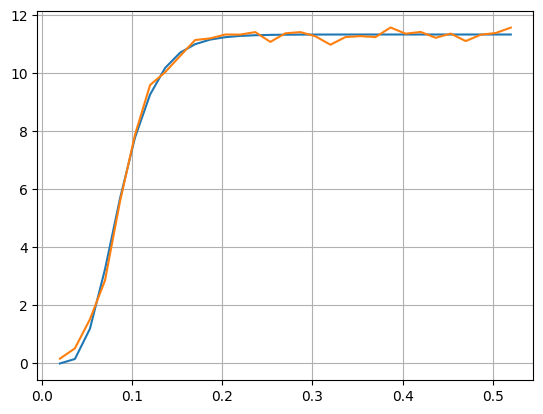

In [7]:
plt.plot(times, inflation_trajectory(times, *popt))
plt.grid()
plt.plot(times, nbars)

In [8]:
popt[0] / MHz, popt[1] ** 2, popt[2] / ns

(np.float64(0.5479056699861353),
 np.float64(11.329499144434628),
 np.float64(26.599826721055177))

# Small cat

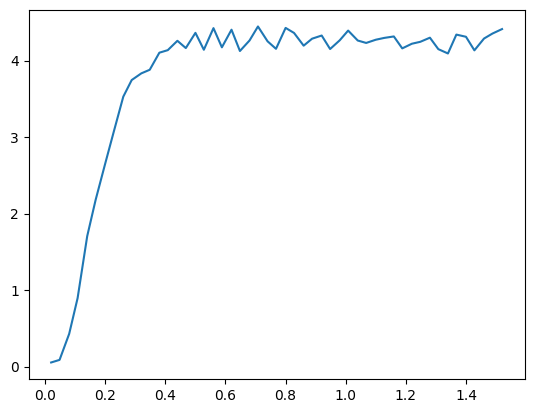

In [9]:
data = np.load("inflation_small_cat.npy", allow_pickle=True).item()
times = data["times"] * ns
nbars = data["nbars"][0]
plt.plot(times, nbars)

|▍         |   4.9% ◆ elapsed 36.47ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     


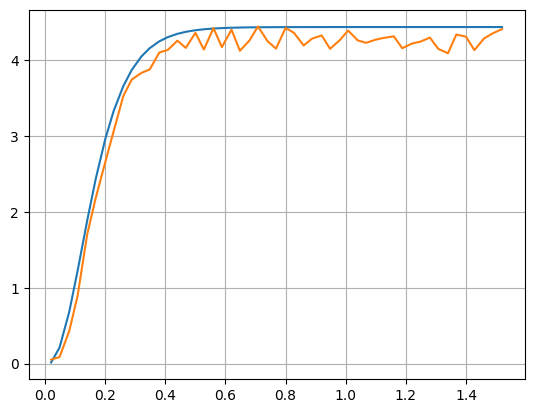

In [10]:
plt.plot(times, inflation_trajectory(times, 0.45 * MHz, jnp.sqrt(4.44), 10 * ns))
plt.grid()
plt.plot(times, nbars)

In [11]:
popt, pcov = curve_fit(
    inflation_trajectory,
    times,
    nbars,
    p0=[0.45 * MHz, jnp.sqrt(4.44), 10 * ns],
    bounds=([0, 0, -100 * ns], [10 * MHz, jnp.sqrt(40), 100 * ns]),
)

|▌         |   5.8% ◆ elapsed 47.35ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.20s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.25s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.26s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.29s ◆ remaining 0.00ms     
|██████████| 100.0% ◆ elapsed 1.29s ◆ re

|▎         |   3.0% ◆ elapsed 15.94ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 1.30s ◆ remaining 0.00ms     


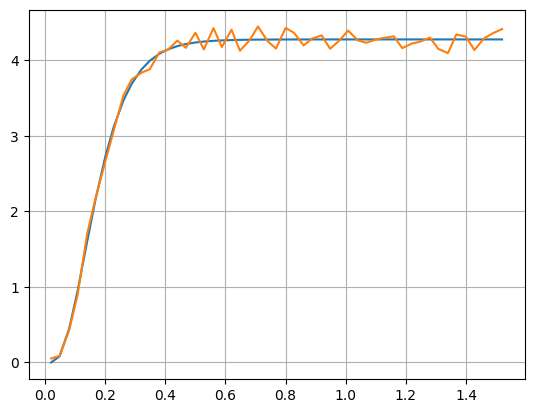

In [12]:
plt.plot(times, inflation_trajectory(times, *popt))
plt.grid()
plt.plot(times, nbars)

In [13]:
popt[0] / MHz, popt[1] ** 2, popt[2] / ns

(np.float64(0.47978399331337396),
 np.float64(4.2765493299733),
 np.float64(25.257983159009715))

# Fitting inflations scaling

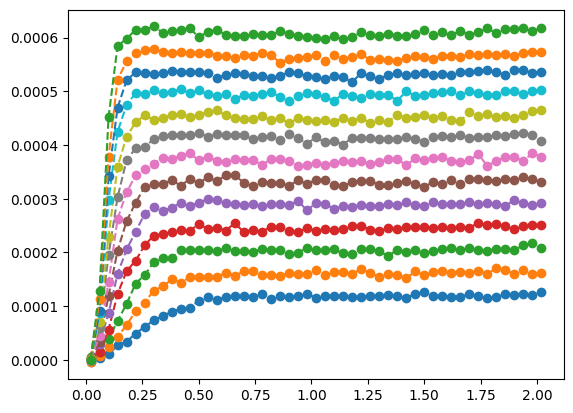

In [10]:
data = np.load("all_inflations.npy", allow_pickle=True).item()
signals = jnp.asarray(data["signals"])
times_full = data["times"]
times = jnp.unique(data["times"]) * ns
cat_sizes = jnp.asarray(data["cat_sizes"])
plt.plot(times, signals.T, "o--")
plt.show()

In [14]:
Na = 40


def inflation_trajectory(_, kappa_2, t0, A, x0):
    a = dq.destroy(Na)
    n_th=0.93
    kappa_1 = 3.65*kHz
    L2s = jnp.sqrt(kappa_2) * (a @ a - cat_sizes[:, None, None] * dq.eye(Na))
    Lad = jnp.sqrt(kappa_1 * (1 + n_th)) * a
    Lau = jnp.sqrt(kappa_1 * n_th) * dq.dag(a)
    times_simu = jnp.linspace(0, times[-1], 10001)
    output = dq.mesolve(
        0 * dq.eye(Na), [L2s, Lad, Lau], dq.fock(Na, 0), times_simu, exp_ops=[dq.dag(a) @ a]
    )
    nbars = output.expects[:, 0].real
    nbars_interp = jnp.asarray([jnp.interp(times - t0, times_simu, nb) for nb in nbars])
    return (nbars_interp * A + x0).flatten()

In [15]:
guess = [0.45 * MHz, 0, 6e-4 / cat_sizes[-1], 0]
traj_guess = inflation_trajectory(_, *guess).reshape(signals.shape)

|██████████| 100.0% ◆ total 2.50s ◆ remaining 00:00


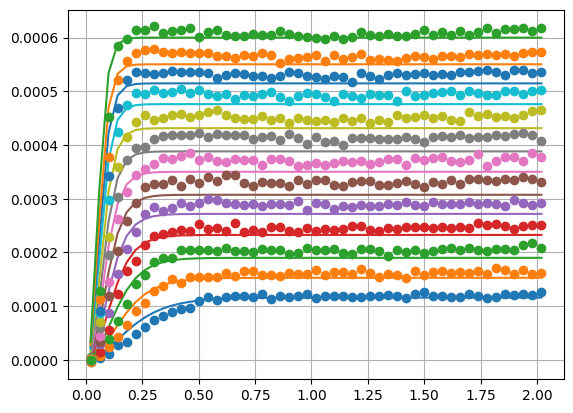

In [16]:
fig, ax = plt.subplots()
ax.plot(times, traj_guess.T)
ax.set_prop_cycle(None)
ax.plot(times, signals.T, "o")
ax.grid()

In [11]:
popt, pcov = curve_fit(
    inflation_trajectory,
    times_full.flatten(),
    signals.flatten(),
    p0=guess,
    bounds=([0, -100 * ns, 0, -1e-4], [10 * MHz, 100 * ns, 1, 1e-4]),
)

|          |   0.0% ◆ elapsed 1.28ms ◆ remaining 0.00ms

|██████████| 100.0% ◆ elapsed 2.34s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.34s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.33s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.34s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.34s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.07s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.07s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.06s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.06s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.07s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.16s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2.16s ◆ remaining 0.00ms  
|██████████| 100.0% ◆ elapsed 2

In [13]:
popt

array([2.65281516e+00, 2.05753848e-02, 3.94981388e-05, 8.02379698e-06])

In [14]:
traj_res = inflation_trajectory(_, *popt).reshape(signals.shape)

|██████████| 100.0% ◆ elapsed 2.23s ◆ remaining 0.00ms  


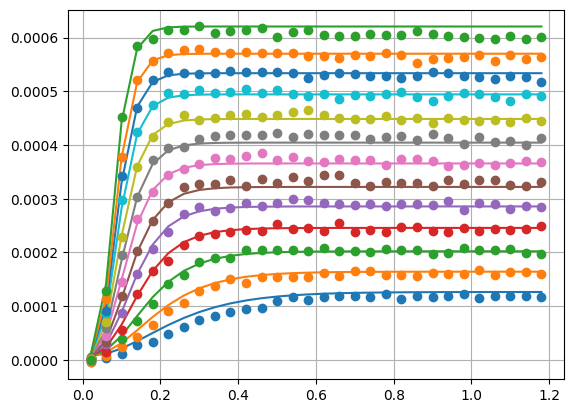

In [18]:
ind_cut = 30
fig, ax = plt.subplots()
ax.plot(times[:ind_cut], traj_res[:, :ind_cut].T)
ax.set_prop_cycle(None)
ax.plot(times[:ind_cut], signals[:, :ind_cut].T, "o")
ax.grid()

In [20]:
popt[0] / MHz, popt[1] / ns, popt[2], popt[3] / popt[2]

(np.float64(0.42220864649444645),
 np.float64(20.57538476297091),
 np.float64(3.949813881601041e-05),
 np.float64(0.20314367255846663))

In [25]:
popt[:, None] * popt[None, :]

array([[7.03742830e+00, 5.45826927e-02, 1.04781262e-04, 2.12856503e-05],
       [5.45826927e-02, 4.23346458e-04, 8.12689404e-07, 1.65092710e-07],
       [1.04781262e-04, 8.12689404e-07, 1.56010297e-09, 3.16925047e-10],
       [2.12856503e-05, 1.65092710e-07, 3.16925047e-10, 6.43813179e-11]])

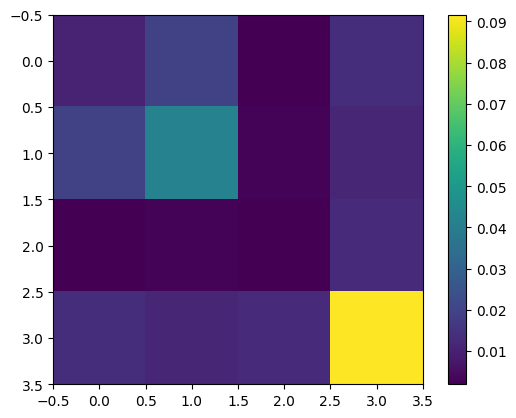

In [26]:
plt.imshow(np.sqrt(np.abs(pcov) / (popt[:, None] * popt[None, :])))
plt.colorbar()

## Fitting nbar at the same time

In [ ]:
def thermal_dm(N, n):
    if n == 0:
        return dq.fock_dm(N, 0)
    i = jnp.arange(N)
    dm = jnp.diag((1.0 + n) ** (-1.0) * (n / (1.0 + n)) ** (i))
    return dq.unit(dm)

In [34]:
Na = 40


def inflation_trajectory(_, kappa_2, t0, A, B, *cat_sizes):
    a = dq.destroy(Na)
    L2s = jnp.sqrt(kappa_2) * (a @ a - jnp.array(cat_sizes)[:, None, None] * dq.eye(Na))
    n_th=0.93
    kappa_1 = 3.65*kHz
    Lad = jnp.sqrt(kappa_1 * (1 + n_th)) * a
    Lau = jnp.sqrt(kappa_1 * n_th) * dq.dag(a)
    times_simu = jnp.linspace(0, times[-1], 10001)
    # output = dq.mesolve(
    #     0 * dq.eye(Na), [L2s], dq.fock(Na, 0), times_simu, exp_ops=[dq.dag(a) @ a]
    # )
    output = dq.mesolve(
        0 * dq.eye(Na), [L2s], thermal_dm(Na, 0.11), times_simu, exp_ops=[dq.dag(a) @ a]
    )
    nbars = output.expects[:, 0].real
    nbars_interp = jnp.asarray([jnp.interp(times - t0, times_simu, nb) for nb in nbars])
    return (nbars_interp * A + B).flatten()

|█████▏    |  52.4% ◆ total 16.06s ◆ remaining 00:01

In [35]:
guess = [0.45 * MHz, 0, 6e-4 / cat_sizes[-1], 0, *cat_sizes]
traj_guess = inflation_trajectory(_, *guess).reshape(signals.shape)

|██████████| 100.0% ◆ total 2.31s ◆ remaining 00:00


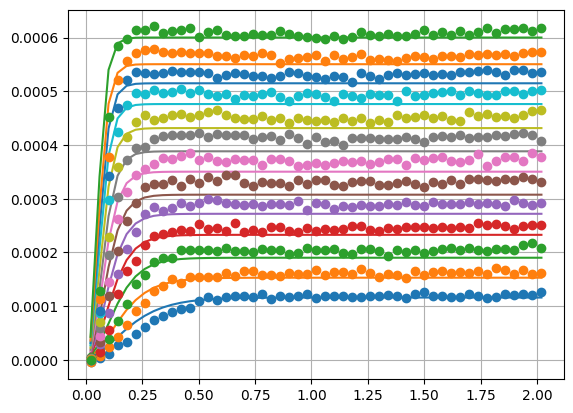

In [36]:
fig, ax = plt.subplots()
ax.plot(times, traj_guess.T)
ax.set_prop_cycle(None)
ax.plot(times, signals.T, "o")
ax.grid()

In [37]:
popt, pcov = curve_fit(
    inflation_trajectory,
    times_full.flatten(),
    signals.flatten(),
    p0=guess,
    bounds=(
        [0, -100 * ns, 0, -5e-4] + [0] * len(cat_sizes),
        [10 * MHz, 100 * ns, 1, 5e-4] + [20] * len(cat_sizes),
    ),
)

|██████████| 100.0% ◆ total 2.21s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.20s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.25s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.28s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.34s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.33s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.37s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.40s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.25s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.25s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.31s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.27s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.31s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.33s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.30s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.25s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.23s ◆ remaining 00:00
|██████████| 100.0% ◆ total 2.22s ◆ remaining 00:00
|██████████| 100.0% ◆ total 1.91s ◆ remaining 00:00
|██████████|

In [38]:
popt

array([ 2.44415891e+00,  1.77746554e-02,  3.94398895e-05, -5.28739559e-06,
        3.14471848e+00,  4.20865030e+00,  5.29798772e+00,  6.35312879e+00,
        7.46544153e+00,  8.52741297e+00,  9.54220776e+00,  1.06201743e+01,
        1.15818515e+01,  1.26934404e+01,  1.36424078e+01,  1.45086064e+01,
        1.55819651e+01])

In [24]:
traj_res = inflation_trajectory(_, *popt).reshape(signals.shape)

|          |   0.0% ◆ total 0.00s ◆ remaining ?

|██████████| 100.0% ◆ total 2.15s ◆ remaining 00:00


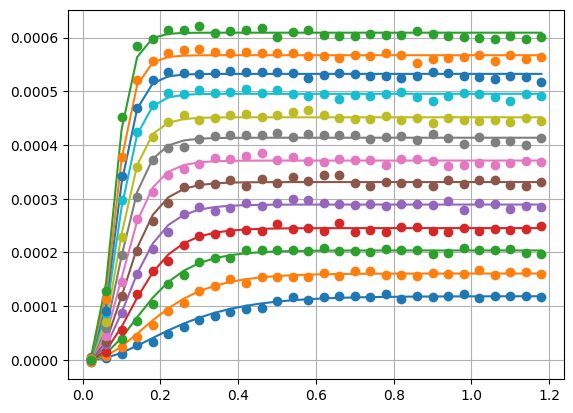

In [25]:
ind_cut = 30
fig, ax = plt.subplots()
ax.plot(times[:ind_cut], traj_res[:, :ind_cut].T)
ax.set_prop_cycle(None)
ax.plot(times[:ind_cut], signals[:, :ind_cut].T, "o")
ax.grid()

In [26]:
popt[0] / MHz, popt[1] / ns, popt[2], popt[3] / popt[2]

(0.40254167391812895,
 16.96399586277217,
 3.952590970606185e-05,
 76340.72790221372)

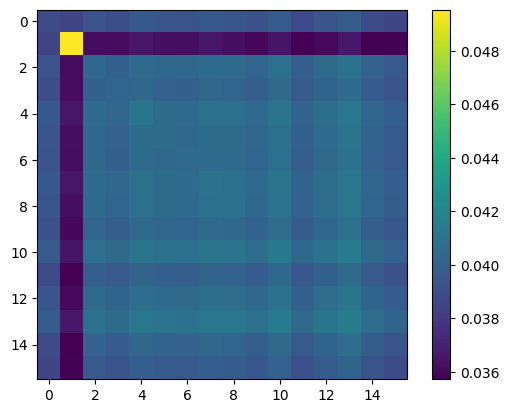

In [46]:
plt.imshow(np.sqrt(np.abs(pcov / (popt[:, None] * popt[None, :]))))
plt.colorbar()

|██████████| 100.0% ◆ total 1.96s ◆ remaining 00:00


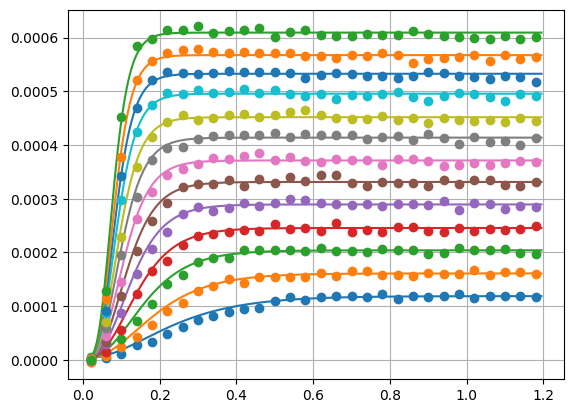

In [28]:
times_fit = jnp.linspace(times[0], times[-1], 10 * len(times))


def inflation_trajectory_res(_, kappa_2, t0, A, *cat_sizes):
    a = dq.destroy(Na)
    L2s = jnp.sqrt(kappa_2) * (a @ a - jnp.array(cat_sizes)[:, None, None] * dq.eye(Na))
    times_simu = jnp.linspace(0, times[-1], 10001)
    # output = dq.mesolve(
    #     0 * dq.eye(Na), [L2s], dq.fock(Na, 0), times_simu, exp_ops=[dq.dag(a) @ a]
    # )
    output = dq.mesolve(
        0 * dq.eye(Na), [L2s], thermal_dm(Na, 0.11), times_simu, exp_ops=[dq.dag(a) @ a]
    )
    nbars = output.expects[:, 0].real
    nbars_interp = jnp.asarray(
        [jnp.interp(times_fit - t0, times_simu, nb) for nb in nbars]
    )
    return nbars_interp * A


traj_res = inflation_trajectory_res(_, *popt)

ind_cut = 30
fig, ax = plt.subplots()
ax.plot(times_fit[: ind_cut * 10], traj_res[:, : ind_cut * 10].T)
ax.set_prop_cycle(None)
ax.plot(times[:ind_cut], signals[:, :ind_cut].T, "o")
ax.grid()

In [29]:
res_dict = {
    "popt": np.asarray(popt).tolist(),
    "pcov": np.asarray(pcov).tolist(),
    "traj_res": traj_res.tolist(),
    "time_fit": times_fit.tolist(),
}

In [62]:
# Save the dictionary to a file
with open("fit_inflation_res.txt", "w") as file:
    file.write(str(res_dict))